In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from MLLibrary import LinearRegression, Utilities, StandardizationScale, Metrics, CreatePolynomialFeatures, NormalizationScale

In [2]:
x_data, y_data = Utilities.load_data('../data/Polynomialdata_train.csv',start_x = 1,start_y = 0,end_y = 1)
print(f'Train data: {x_data.shape} {y_data.shape}')

Train data: (50000, 3) (50000, 1)


In [3]:
x_data_poly = CreatePolynomialFeatures.poly_transform(x_data, 8)
scaler = StandardizationScale()
x_data_scaled = scaler.fit_transform(x_data_poly)
scaler2 = NormalizationScale()
x_data_scaled = scaler2.fit_transform(x_data_scaled)

print(np.ptp(x_data_scaled, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Polynomial Model for Degree 8 

Epoch   4 ⫸ Cost 6297137684963.462  ⫷
Epoch   8 ⫸ Cost 2761069164159.247  ⫷
Epoch  12 ⫸ Cost 1767382984656.926  ⫷
Epoch  16 ⫸ Cost 1337696971828.034  ⫷
Epoch  20 ⫸ Cost 1083640210458.548  ⫷
Epoch  24 ⫸ Cost  912112565595.681  ⫷
Epoch  28 ⫸ Cost  796400386398.387  ⫷
Epoch  32 ⫸ Cost  700441896962.425  ⫷
Epoch  36 ⫸ Cost  625261221413.085  ⫷
Epoch  40 ⫸ Cost  565645978004.784  ⫷


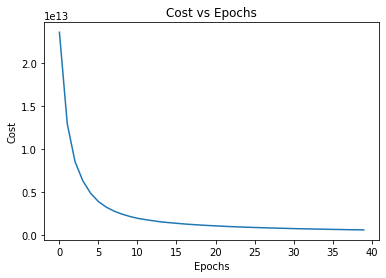

In [6]:
alpha = 0.7
lambda_ = 0
epochs = 40
model = LinearRegression()
w_final, b_final, cost_history = model.fit(x_data_scaled, y_data, alpha, epochs,lambda_,plot_cost=True)

In [7]:
yhat_train = model.predict(x_data_scaled)
print(f'Train: {Metrics.r2_score(yhat_train,y_data)}')

Train: 0.9904819849328905


In [13]:
x_test = Utilities.load_data('../data/Polynomialdata_test.csv', start_x=1)
x_test_poly = CreatePolynomialFeatures.poly_transform(x_test, 8)
x_test_scaled = scaler.transform(x_test_poly)
x_test_scaled = scaler2.transform(x_test_scaled)
print(f'Train data: {x_test_scaled.shape}')

Train data: (10000, 164)


In [15]:
y_test = model.predict(x_test_scaled)
print(y_test.shape)
df = pd.DataFrame(y_test, columns=['predicted value'])
df.to_csv('Polynomialdata_result.csv', index=False)

(10000, 1)
